In [18]:
print("hello")
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
import os



hello


In [ ]:
# Path of my dataset
data_dir = r"D:\cellula\task1\Teeth DataSet\Teeth_Dataset"

# Parameter
img_size = (224, 224)   # resize images to this size
batch_size = 32

In [20]:
# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_dir, "training"),
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_dir, "validation"),
    image_size=img_size,
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_dir, "testing"),
    image_size=img_size,
    batch_size=batch_size
)

num_classes = len(train_ds.class_names)


class_names = train_ds.class_names
print("Class names:", class_names)


Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Class names: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [21]:
print("Class names:", class_names)
for images, labels in train_ds.take(1):
    print("Sample labels:", labels.numpy())


Class names: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']
Sample labels: [5 2 5 2 0 6 5 0 2 5 3 3 1 6 1 3 2 6 0 0 5 3 2 5 3 5 5 1 5 6 4 2]


In [22]:

for images, labels in val_ds.take(1):
    print("Images shape:", images.shape)
    print("Labels:", labels.numpy())
 


Images shape: (32, 224, 224, 3)
Labels: [6 0 3 3 2 1 6 3 1 3 5 6 1 5 5 1 0 5 2 2 5 5 0 3 5 3 3 5 3 5 3 0]


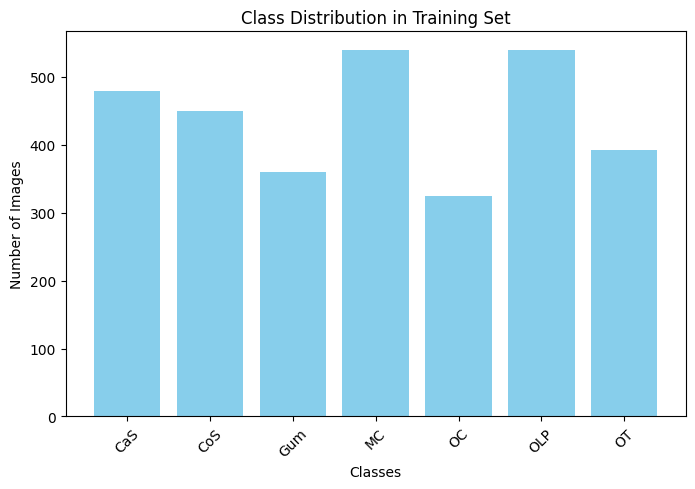

In [ ]:
#  Class Distribution
class_counts = {class_name: 0 for class_name in class_names}

for _, labels in train_ds.unbatch():
    class_counts[class_names[labels.numpy()]] += 1

plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Set")
plt.xticks(rotation=45)
plt.show()

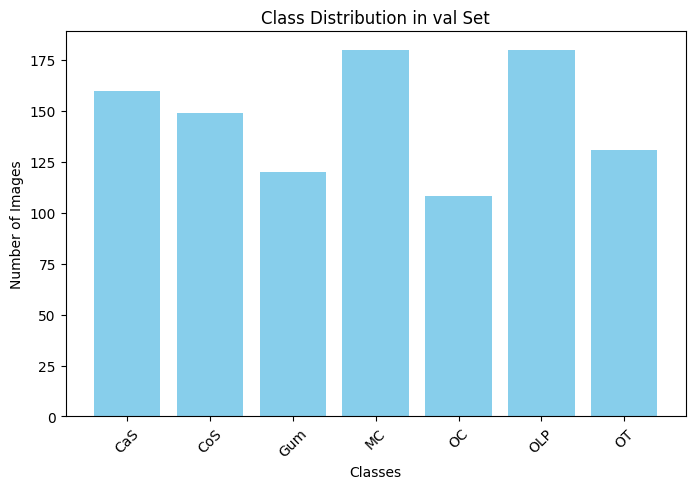

In [46]:

class_counts = {class_name: 0 for class_name in class_names}

for _, labels in val_ds.unbatch():
    class_counts[class_names[labels.numpy()]] += 1

plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in val Set")
plt.xticks(rotation=45)
plt.show()

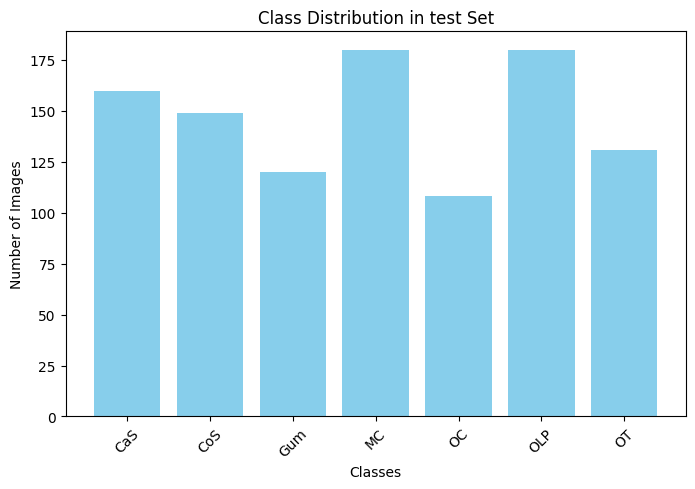

In [47]:

class_counts = {class_name: 0 for class_name in class_names}

for _, labels in test_ds.unbatch():
    class_counts[class_names[labels.numpy()]] += 1

plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in test Set")
plt.xticks(rotation=45)
plt.show()

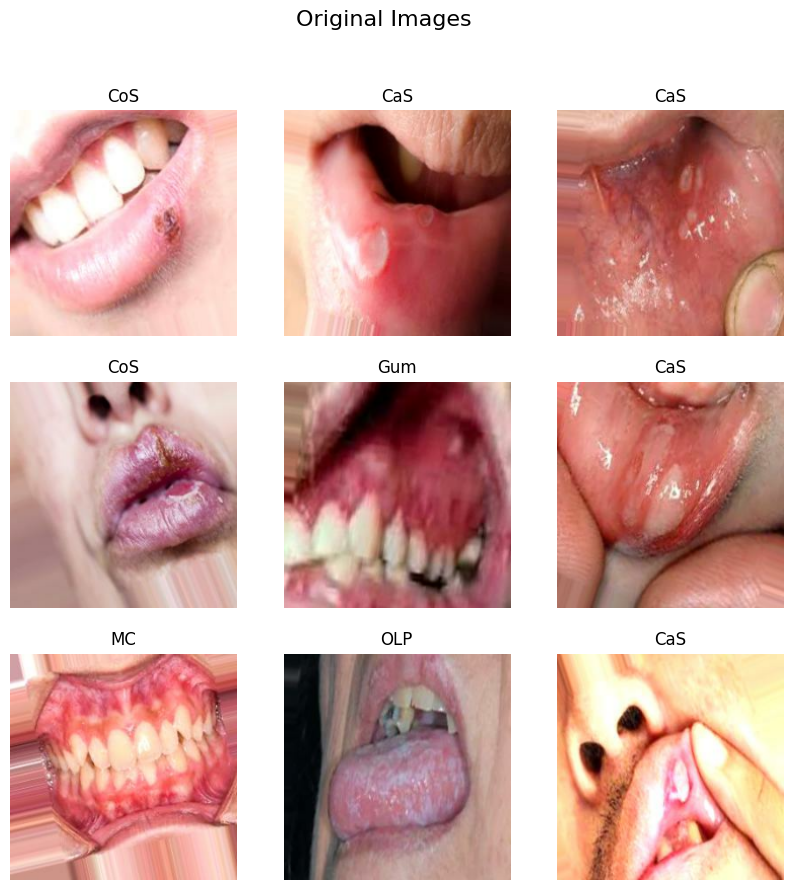

In [24]:
# ✅ 2. Show Original Images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.suptitle("Original Images", fontsize=16)
plt.show()

In [25]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

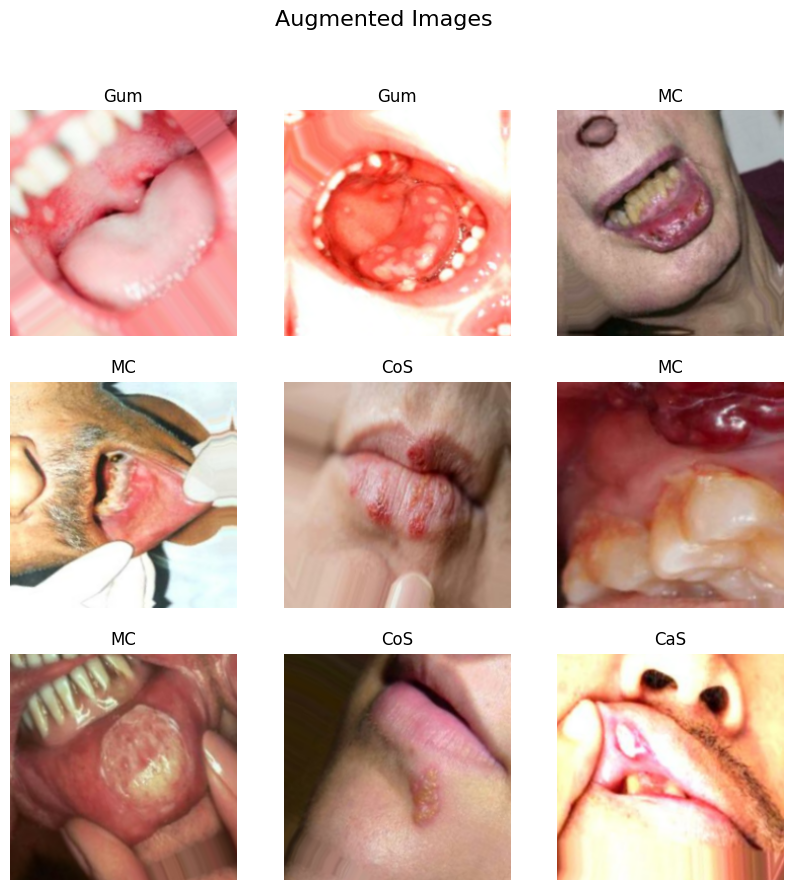

In [26]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_img = data_augmentation(images[i])
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_img.numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.suptitle("Augmented Images", fontsize=16)
plt.show()

In [27]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)


In [28]:
# Normalize images (0-255 → 0-1)
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


In [29]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [ ]:

# Build a simple CNN model

model = keras.Sequential([
    data_augmentation,
    layers.Conv2D(32, 3, activation='relu', input_shape=img_size + (3,)),
    layers.MaxPooling2D(),
    #add   layers.Conv2D(32, 3, activation='relu', input_shape=img_size + (3,)),
    #layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [48]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_7 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,509,591 (127.83 MB)

 Trainable params: 11,169,863 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,339,728 (85.22 MB)

In [31]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",      # what to monitor
    patience=3,              # stop if no improvement for 3 epochs
    restore_best_weights=True  # roll back to best weights
)


In [32]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model.h5",         # file path
    monitor="val_loss",      # what to monitor
    save_best_only=True,     # save only the best version
    verbose=1
)


In [33]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,    # reduce LR by half
    patience=2,    # wait 2 epochs of no improvement
    verbose=1
)


In [34]:
class PrintEpochCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"✅ Finished epoch {epoch+1}, loss={logs['loss']:.4f}, acc={logs['accuracy']:.4f}")


In [36]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=35,
    callbacks=[early_stop, checkpoint, reduce_lr, PrintEpochCallback()]
)



Epoch 1/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.1797 - loss: 2.1239
Epoch 1: val_loss improved from None to 1.75359, saving model to best_model.h5


✅ Finished epoch 1, loss=1.9287, acc=0.2154
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 150ms/step - accuracy: 0.2154 - loss: 1.9287 - val_accuracy: 0.3171 - val_loss: 1.7536 - learning_rate: 0.0010
Epoch 2/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.3338 - loss: 1.7247
Epoch 2: val_loss improved from 1.75359 to 1.45831, saving model to best_model.h5


✅ Finished epoch 2, loss=1.6741, acc=0.3511
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.3511 - loss: 1.6741 - val_accuracy: 0.4368 - val_loss: 1.4583 - learning_rate: 0.0010
Epoch 3/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.4100 - loss: 1.5164
Epoch 3: val_loss improved from 1.45831 to 1.36421, saving model to best_model.h5


✅ Finished epoch 3, loss=1.5114, acc=0.4085
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step - accuracy: 0.4085 - loss: 1.5114 - val_accuracy: 0.5019 - val_loss: 1.3642 - learning_rate: 0.0010
Epoch 4/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.4682 - loss: 1.4088
Epoch 4: val_loss improved from 1.36421 to 1.34095, saving model to best_model.h5


✅ Finished epoch 4, loss=1.4289, acc=0.4551
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.4551 - loss: 1.4289 - val_accuracy: 0.4893 - val_loss: 1.3409 - learning_rate: 0.0010
Epoch 5/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.4952 - loss: 1.2962
Epoch 5: val_loss improved from 1.34095 to 1.17748, saving model to best_model.h5


✅ Finished epoch 5, loss=1.2754, acc=0.5105
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.5105 - loss: 1.2754 - val_accuracy: 0.5593 - val_loss: 1.1775 - learning_rate: 0.0010
Epoch 6/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5623 - loss: 1.1796
Epoch 6: val_loss did not improve from 1.17748
✅ Finished epoch 6, loss=1.1861, acc=0.5594
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.5594 - loss: 1.1861 - val_accuracy: 0.5652 - val_loss: 1.1827 - learning_rate: 0.0010
Epoch 7/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5634 - loss: 1.1616
Epoch 7: val_loss improved from 1.17748 to 1.17347, saving model to best_model.h5


✅ Finished epoch 7, loss=1.1430, acc=0.5789
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.5789 - loss: 1.1430 - val_accuracy: 0.5642 - val_loss: 1.1735 - learning_rate: 0.0010
Epoch 8/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.6202 - loss: 1.0711
Epoch 8: val_loss improved from 1.17347 to 0.96373, saving model to best_model.h5


✅ Finished epoch 8, loss=1.0390, acc=0.6246
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.6246 - loss: 1.0390 - val_accuracy: 0.6625 - val_loss: 0.9637 - learning_rate: 0.0010
Epoch 9/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.6641 - loss: 0.9429
Epoch 9: val_loss improved from 0.96373 to 0.89301, saving model to best_model.h5


✅ Finished epoch 9, loss=0.9224, acc=0.6696
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step - accuracy: 0.6696 - loss: 0.9224 - val_accuracy: 0.6770 - val_loss: 0.8930 - learning_rate: 0.0010
Epoch 10/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.6734 - loss: 0.9144
Epoch 10: val_loss improved from 0.89301 to 0.87399, saving model to best_model.h5


✅ Finished epoch 10, loss=0.9009, acc=0.6712
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.6712 - loss: 0.9009 - val_accuracy: 0.6858 - val_loss: 0.8740 - learning_rate: 0.0010
Epoch 11/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7143 - loss: 0.8087
Epoch 11: val_loss improved from 0.87399 to 0.77826, saving model to best_model.h5


✅ Finished epoch 11, loss=0.8069, acc=0.7156
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.7156 - loss: 0.8069 - val_accuracy: 0.7315 - val_loss: 0.7783 - learning_rate: 0.0010
Epoch 12/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7312 - loss: 0.7886
Epoch 12: val_loss improved from 0.77826 to 0.74918, saving model to best_model.h5


✅ Finished epoch 12, loss=0.8067, acc=0.7272
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step - accuracy: 0.7272 - loss: 0.8067 - val_accuracy: 0.7315 - val_loss: 0.7492 - learning_rate: 0.0010
Epoch 13/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7703 - loss: 0.6501
Epoch 13: val_loss improved from 0.74918 to 0.67859, saving model to best_model.h5


✅ Finished epoch 13, loss=0.6690, acc=0.7661
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.7661 - loss: 0.6690 - val_accuracy: 0.7519 - val_loss: 0.6786 - learning_rate: 0.0010
Epoch 14/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7907 - loss: 0.6057
Epoch 14: val_loss improved from 0.67859 to 0.66113, saving model to best_model.h5


✅ Finished epoch 14, loss=0.6580, acc=0.7729
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.7729 - loss: 0.6580 - val_accuracy: 0.7656 - val_loss: 0.6611 - learning_rate: 0.0010
Epoch 15/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.7944 - loss: 0.5994
Epoch 15: val_loss improved from 0.66113 to 0.58727, saving model to best_model.h5


✅ Finished epoch 15, loss=0.5899, acc=0.7920
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.7920 - loss: 0.5899 - val_accuracy: 0.7986 - val_loss: 0.5873 - learning_rate: 0.0010
Epoch 16/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8094 - loss: 0.5353
Epoch 16: val_loss did not improve from 0.58727
✅ Finished epoch 16, loss=0.5277, acc=0.8131
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.8131 - loss: 0.5277 - val_accuracy: 0.7860 - val_loss: 0.5965 - learning_rate: 0.0010
Epoch 17/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8316 - loss: 0.4686
Epoch 17: val_loss improved from 0.58727 to 0.52856, saving model to best_model.h5


✅ Finished epoch 17, loss=0.4823, acc=0.8296
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.8296 - loss: 0.4823 - val_accuracy: 0.8132 - val_loss: 0.5286 - learning_rate: 0.0010
Epoch 18/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8437 - loss: 0.4330
Epoch 18: val_loss did not improve from 0.52856
✅ Finished epoch 18, loss=0.4828, acc=0.8244
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.8244 - loss: 0.4828 - val_accuracy: 0.7967 - val_loss: 0.5699 - learning_rate: 0.0010
Epoch 19/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8409 - loss: 0.4672
Epoch 19: val_loss did not improve from 0.52856

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
✅ Finished epoch 19, loss=0.4392, acc=0.8549
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.8549 - loss: 0.4392 - val_accuracy: 0.8054 - val_loss: 0.5576 - learning_rate: 0.0010
Epoch 20/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.8881 - loss: 0.3113
Epoc

✅ Finished epoch 20, loss=0.3135, acc=0.8937
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.8937 - loss: 0.3135 - val_accuracy: 0.8492 - val_loss: 0.4197 - learning_rate: 5.0000e-04
Epoch 21/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9206 - loss: 0.2505
Epoch 21: val_loss did not improve from 0.41971
✅ Finished epoch 21, loss=0.2645, acc=0.9155
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.9155 - loss: 0.2645 - val_accuracy: 0.8453 - val_loss: 0.4397 - learning_rate: 5.0000e-04
Epoch 22/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9126 - loss: 0.2741
Epoch 22: val_loss did not improve from 0.41971

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
✅ Finished epoch 22, loss=0.2768, acc=0.9077
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.9077 - loss: 0.2768 - val_accuracy: 0.8482 - val_loss: 0.4536 - learning_rate: 5.0000e-04
Epoch 23/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9404 - loss:

✅ Finished epoch 23, loss=0.2014, acc=0.9375
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.9375 - loss: 0.2014 - val_accuracy: 0.8716 - val_loss: 0.3923 - learning_rate: 2.5000e-04
Epoch 24/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9336 - loss: 0.1907
Epoch 24: val_loss did not improve from 0.39232
✅ Finished epoch 24, loss=0.2009, acc=0.9297
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.9297 - loss: 0.2009 - val_accuracy: 0.8667 - val_loss: 0.3963 - learning_rate: 2.5000e-04
Epoch 25/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9230 - loss: 0.2248
Epoch 25: val_loss improved from 0.39232 to 0.36255, saving model to best_model.h5


✅ Finished epoch 25, loss=0.1941, acc=0.9372
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step - accuracy: 0.9372 - loss: 0.1941 - val_accuracy: 0.8774 - val_loss: 0.3625 - learning_rate: 2.5000e-04
Epoch 26/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9421 - loss: 0.1852
Epoch 26: val_loss improved from 0.36255 to 0.35037, saving model to best_model.h5


✅ Finished epoch 26, loss=0.1876, acc=0.9397
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.9397 - loss: 0.1876 - val_accuracy: 0.8823 - val_loss: 0.3504 - learning_rate: 2.5000e-04
Epoch 27/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9380 - loss: 0.1975
Epoch 27: val_loss did not improve from 0.35037
✅ Finished epoch 27, loss=0.1851, acc=0.9410
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.9410 - loss: 0.1851 - val_accuracy: 0.8862 - val_loss: 0.3506 - learning_rate: 2.5000e-04
Epoch 28/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9426 - loss: 0.1690
Epoch 28: val_loss did not improve from 0.35037

Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
✅ Finished epoch 28, loss=0.1671, acc=0.9436
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.9436 - loss: 0.1671 - val_accuracy: 0.8774 - val_loss: 0.3693 - learning_rate: 2.5000e-04
Epoch 29/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9544 - loss:

✅ Finished epoch 29, loss=0.1536, acc=0.9543
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.9543 - loss: 0.1536 - val_accuracy: 0.8940 - val_loss: 0.3295 - learning_rate: 1.2500e-04
Epoch 30/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9500 - loss: 0.1543
Epoch 30: val_loss did not improve from 0.32949
✅ Finished epoch 30, loss=0.1486, acc=0.9530
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.9530 - loss: 0.1486 - val_accuracy: 0.8794 - val_loss: 0.3356 - learning_rate: 1.2500e-04
Epoch 31/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9609 - loss: 0.1268
Epoch 31: val_loss did not improve from 0.32949

Epoch 31: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
✅ Finished epoch 31, loss=0.1248, acc=0.9618
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.9618 - loss: 0.1248 - val_accuracy: 0.8959 - val_loss: 0.3298 - learning_rate: 1.2500e-04
Epoch 32/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9524 - loss: 

✅ Finished epoch 32, loss=0.1321, acc=0.9592
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.9592 - loss: 0.1321 - val_accuracy: 0.8920 - val_loss: 0.3120 - learning_rate: 6.2500e-05
Epoch 33/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9586 - loss: 0.1280
Epoch 33: val_loss did not improve from 0.31200
✅ Finished epoch 33, loss=0.1245, acc=0.9627
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.9627 - loss: 0.1245 - val_accuracy: 0.8959 - val_loss: 0.3407 - learning_rate: 6.2500e-05
Epoch 34/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9596 - loss: 0.1351
Epoch 34: val_loss did not improve from 0.31200

Epoch 34: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
✅ Finished epoch 34, loss=0.1245, acc=0.9647
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.9647 - loss: 0.1245 - val_accuracy: 0.8901 - val_loss: 0.3364 - learning_rate: 6.2500e-05
Epoch 35/35
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9657 - loss:

✅ Finished epoch 35, loss=0.1204, acc=0.9637
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.9637 - loss: 0.1204 - val_accuracy: 0.9027 - val_loss: 0.2999 - learning_rate: 3.1250e-05


In [37]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8979 - loss: 0.2927
Test Accuracy: 0.8978599309921265


In [39]:
# Load best saved model
best_model = keras.models.load_model("best_model.h5")



In [41]:
# Predict on a new image
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img_path = r"D:\cellula\task1\Teeth DataSet\Teeth_Dataset\Testing\OC\oc_1201_0_3017.jpg"

# Load image and preprocess
img = load_img(img_path, target_size=img_size)
img_array = img_to_array(img) / 255.0  # normalize
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# Prediction
predictions = best_model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: OC


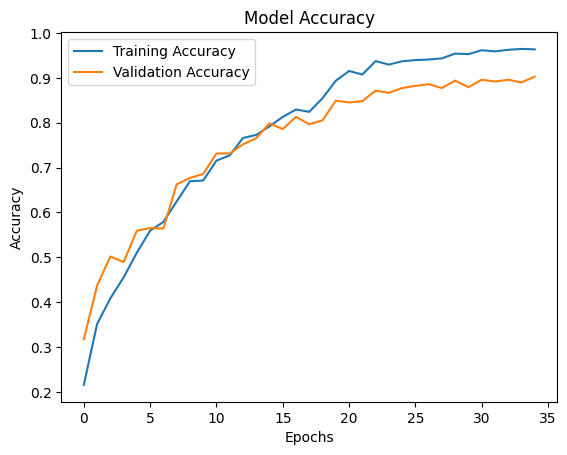

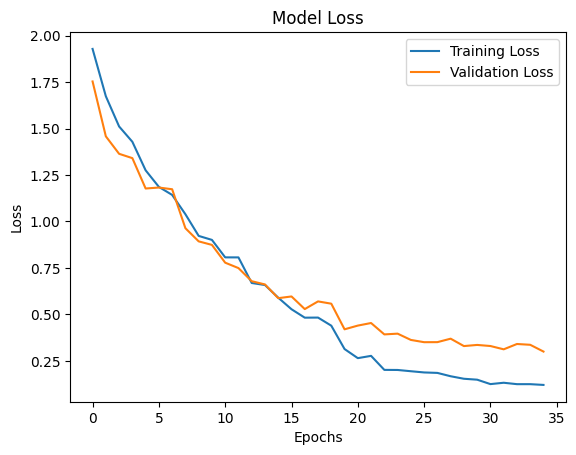

In [42]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()